# Quick and Dirty Guide To Numpy


**So you want to learn about numpy?**

Numpy is an important library for anyone wanting to work with large scale datasets in Python.  Numpy arrays provide value because they are easier and faster to manipulate than traditional python lists.

### Why use numpy arrays instead of Python lists?

1. Saves you time as a programmer: when using lists, you have to use loops to apply a function to each element of an array.  In numpy, all common mathematical computations can be vectorized.  This leads to a much faster runtime, as well as fewer lines of code. 

2. Under the hood, numpy arrays use less memory, and are constrained to a single data type, which enables faster execution.

<img src="memory_diagram.png">

The figure above shows the memory diagram of a numpy array.  Python lists have special functionality where their elements don't all have to be of the same type.  As a result, under the hood python lists are actually an array of pointers that point to the actual array elements.  Hopefully, this fact provides some intuition as to why many operations run faster with numpy arrays as the underlying data structure! Neat!

### Let's get started!

In [161]:
#It's a common convention to abbreviate numpy as np
import numpy as np

## Stuff from last time

### Creating a Numpy Array
There are many ways to create a numpy array.  In general, the options are 
- converting other Python data structures to np.array format
- numpy functions that create new arrays (i.e. np.ones, np.zeros, np.arange)
- reading files from disk (in this class, mostly images)

Note that unlike lists, you can't create an empty numpy array

In [162]:
# create a 1 dimensional array from a list: [1,2,3,4,5]
print("1 dimensional: ")
x = np.array([1,2,3,4,5])
print("Shape: ", x.shape)
x

1 dimensional: 
Shape:  (5,)


array([1, 2, 3, 4, 5])

In [163]:
# Create a 2-d array from multiple lists: 
    # first row = [1,2,3,4,5]
    # second row = [6,7,8,9,10]
print("2 dimensional: ")
y = np.array([[1,2,3,4,5], [6,7,8,9,10]])
print("Shape: ", y.shape)
y

2 dimensional: 
Shape:  (2, 5)


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [164]:
# you can create an array of any dimensions using np.zeros
z = np.zeros((3,3))
z

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [165]:
#other handy things
identity = np.identity(3)
print(identity)

ones = np.ones((2,2))
ones

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([[1., 1.],
       [1., 1.]])

### Array attributes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Take a look at the attributes associated with a numpy array, and then we'll explore how numpy arrays determine their type.

In [166]:
print(identity.shape) #returns tuple of dimensions
print(identity.size) # returns total number of elements
print(identity.dtype) #the default dtype is float64

(3, 3)
9
float64


In [167]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int32 float64 int64


### Accessing elements

Numpy offers several ways to index into arrays. When arrays are one dimensional, indexing works just like lists. When arrays are 2 or more dimensional, you specify an index for each dimension:

`value = array[row_index, col_index]`

In [168]:
# Create a 2-dimensional array (matrix)
# [[ 1  2  3]
#  [ 4  5  6]]
a = np.array([[1,2,3],[4,5,6]])   
print(a)

# Access the 3 with array indexing
a_3 = a[0,2]
print("expecting 3, got: ", a_3)

# Access the 4 with array indexing
a_4 = a[1,0]
print("expecting 4, got: ", a_4)

[[1 2 3]
 [4 5 6]]
expecting 3, got:  3
expecting 4, got:  4


Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array. Recall how slicing works in lists:

In [169]:
# Recall list slicing:
l = [0,1,2,3,4]

print(l)
print("All elements of l: ", l[:])
print("All after 2nd element: ", l[2:])
print("All before 2nd element: ", l[:2])
print("All between 1st and 3rd element exclusive: ", l[1:3])

[0, 1, 2, 3, 4]
All elements of l:  [0, 1, 2, 3, 4]
All after 2nd element:  [2, 3, 4]
All before 2nd element:  [0, 1]
All between 1st and 3rd element exclusive:  [1, 2]


Now let's try slicing in two dimensions!

In [170]:
print("a = \n", a)

# Access the 0th row of a:
a_row0 = a[0,:]
print("0th row expecting [1,2,3], got: ", a_row0)

# Access the 0th column of a
a_col0 = a[:,0]
print("0th column expecting [1,4], got: ", a_col0)

a = 
 [[1 2 3]
 [4 5 6]]
0th row expecting [1,2,3], got:  [1 2 3]
0th column expecting [1,4], got:  [1 4]


In [171]:
# TODO: Create the following rank 2 array with shape (3, 4)
# [[ 1,  2,  3,  4]
#  [ 5,  6,  7,  8]
#  [ 9, 10, 11, 12]
#  [13, 14, 15, 16]]

# HINT: if you want to take a fancy shortcut, use np.arange() to create this matrix

b = np.array([[ 1,  2,  3,  4],
              [ 5,  6,  7,  8],
              [ 9, 10, 11, 12],
              [ 13, 14, 15, 16]])
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [172]:
# TODO: use slicing to pull out the middle two rows
b_rows = b[1:3,:]
print("middle two rows: \n", b_rows)

# TODO: use slicing to pull out the middle two columns
b_cols = b[:,1:3]
print("middle two columns: \n", b_cols)

# TODO: use slicing to pull out only the middle two rows and middle two columns,
# meaning a (2,2) array: 
# [[6 7]
#  [10 11]]
b_center = b[1:3,1:3]
print("center two columns and two rows: \n", b_center)


middle two rows: 
 [[ 5  6  7  8]
 [ 9 10 11 12]]
middle two columns: 
 [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]
center two columns and two rows: 
 [[ 6  7]
 [10 11]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [173]:
# [[ 1  2  3]
#  [ 4  5  6]]
a = np.array([[1,2,3],[4,5,6]])   
print("original a = \n", a)

a_row0 = a[0,:]
a_row0[1] = 100 # a_row0[1] is the same piece of data as a[0, 1]

print("new a = \n", a)

original a = 
 [[1 2 3]
 [4 5 6]]
new a = 
 [[  1 100   3]
 [  4   5   6]]


### Matrix Operations
Numpy makes it easy to do matrix operations on arrays, like multiply, invert, etc. Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module

In [174]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print("x = \n", x)
print(x.dtype)
print("y = \n", y)
print(y.dtype)



x = 
 [[1. 2.]
 [3. 4.]]
float64
y = 
 [[5. 6.]
 [7. 8.]]
float64


In [175]:
#all arithmetic operations are applied to a matrix element-wise
print("Original x: ")
print(x)
print("\nx+1")
print(x + 1)
print("\nx*4.5")
print(4.5*x)
print("\nx/2.0")
print(x/2.0)

Original x: 
[[1. 2.]
 [3. 4.]]

x+1
[[2. 3.]
 [4. 5.]]

x*4.5
[[ 4.5  9. ]
 [13.5 18. ]]

x/2.0
[[0.5 1. ]
 [1.5 2. ]]


In [176]:
# Elementwise sum; both produce the array
print("x = \n", x)
print("y = \n", y)
print("\nx+y:")
print(x + y)
print(np.add(x, y))

x = 
 [[1. 2.]
 [3. 4.]]
y = 
 [[5. 6.]
 [7. 8.]]

x+y:
[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [177]:
# Elementwise difference; both produce the array
print("x = \n", x)
print("y = \n", y)
print("\nx-y:")
print(x - y)
print(np.subtract(x, y))

x = 
 [[1. 2.]
 [3. 4.]]
y = 
 [[5. 6.]
 [7. 8.]]

x-y:
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [178]:
# Elementwise product; both produce the array
print("x = \n", x)
print("y = \n", y)
print("\nx*y:")
print(x * y)
print(np.multiply(x, y))

x = 
 [[1. 2.]
 [3. 4.]]
y = 
 [[5. 6.]
 [7. 8.]]

x*y:
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [179]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print("x = \n", x)
print("y = \n", y)
print("\nx/y:")
print(x / y)
print(np.divide(x, y))

x = 
 [[1. 2.]
 [3. 4.]]
y = 
 [[5. 6.]
 [7. 8.]]

x/y:
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [180]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print("x = \n", x)
print("\nsqrt(x):")
print(np.sqrt(x))

x = 
 [[1. 2.]
 [3. 4.]]

sqrt(x):
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [181]:
# Elementwise power; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print("x = \n", x)
print("\nx^2:")
print(np.power(x,2))

x = 
 [[1. 2.]
 [3. 4.]]

x^2:
[[ 1.  4.]
 [ 9. 16.]]


In [182]:
# Will this multiplication operator do elementwise multiplication or matrix multiplication?
x*y

array([[ 5., 12.],
       [21., 32.]])

Let's practice these operations!

Given arrays x and y, write array z as a function of x and y: z[0] = x[0] - y[0], and z[1] = x[1] - y[1]. Use numpy operations!

Hint: think about how the 2 equations may be written with vector operations (such as those above), and that will translate cleanly to numpy 

In [183]:
# TODO
x = np.array([1,3])
y = np.array([2,5])
z = np.array([-1,-2])

z_computed = x - y
print("Your answer: ", z_computed)
print("Expecting: ", z)
if z.all() == z_computed.all():
    print("Correct!")
else:
    print("Try thinking of a numpy function above with x and y that gets you equivalent to z")

Your answer:  [-1 -2]
Expecting:  [-1 -2]
Correct!


Now, try using the numpy functions to calculate x = ((a+b)*c) - d

If you get stuck, try following the order of operations with the parenthesis and compute a+b first and verify by hand, and then proceed to (a+b)*c, and so on.

In [184]:

a = np.array([1,3])
b = np.array([1,1])
c = np.array([2,1/2])
d = np.array([1,1])
x = np.array([3,1])

# TODO
answer =((a+b)*c)-d 

print("Your answer: ", answer)
print("Expecting: ", x)
if x.all() == answer.all():
    print("Correct!")
else:
    print("Try thinking of a which numpy functions above with a,b, and c gets you equivalent to x")

Your answer:  [3. 1.]
Expecting:  [3 1]
Correct!


### Axis-based operations

Now that we've covered 2d indexing, there's some important numpy functions that operate on a particular axis, so let's get hands on with sum()! Many numpy operations including sum, max, argmax, mean, standard deviation operate over a chosen axis of your array. 

Sum can sum all elements of the 2d array, or it can sum across each row, or sum down each column. 

Axis 0 corresponds to columns, and axis 1 corresponds to rows, just like indexing. When you apply an operation like sum over axis 0, that means axis 0 is being squashed into length 1 by the sum, max, etc. operation.

In [185]:
#numpy arrays have builtin methods to calculate summary statistics such as std. dev., mean, min, max, sum
y = np.random.random(9).reshape(3,3)
print("std:", y.std())
print("mean:", y.mean())
print("sum:", y.sum())

print(y)
#you can also do these operations with respect to a particular axis
print("std (rows):", y.std(axis = 1))
print("mean (rows):", y.mean(axis = 1))
print("mean (column):", y.mean(axis = 0))

std: 0.1978278175862008
mean: 0.6428276752885452
sum: 5.785449077596907
[[0.68694524 0.66483223 0.92717801]
 [0.66875117 0.43061361 0.25799392]
 [0.56722517 0.67796367 0.90394605]]
std (rows): [0.11880239 0.1684005  0.14012375]
mean (rows): [0.75965183 0.4524529  0.7163783 ]
mean (column): [0.64097386 0.5911365  0.69637266]


In [186]:
# Sum of an array along various axes
x = np.array([[1,2],[3,4]])
print(x)
print()
print(np.sum(x))  # Compute sum of all elements; prints "10"
print()
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print()
print(np.sum(x, axis=1)) # Compute sum of each row; prints "[3 7]"

[[1 2]
 [3 4]]

10

[4 6]

[3 7]


In [187]:
# Sum of a vector doesn't need to specify axis since there's only one axis
x = np.array([1,2,3])
print(x)
print(np.sum(x))

[1 2 3]
6


Your turn!

In [188]:
# Get hands-on with sum! Guess what the output will be and then run it to confirm
x = np.array([[1,2,3],[4,5,6],[3,2,1]])
print("x = \n", x)


x = 
 [[1 2 3]
 [4 5 6]
 [3 2 1]]


In [189]:
#np.sum(x)
# TODO:
guess = np.sum(x)
print("Your guess for np.sum(x): ", guess)
print("Actual = ", np.sum(x))

Your guess for np.sum(x):  27
Actual =  27


In [190]:
#np.sum(x, axis=1)
# TODO:
guess = np.sum(x, axis=1)
print("Your guess for np.sum(x, axis=1): ", guess)
print("Actual = ", np.sum(x, axis=1))

Your guess for np.sum(x, axis=1):  [ 6 15  6]
Actual =  [ 6 15  6]


In [191]:
#np.sum(x, axis=0)
# TODO:
guess =np.sum(x, axis=0)
print("Your guess for np.sum(x, axis=0): ", guess)
print("Actual = ", np.sum(x, axis=0))

Your guess for np.sum(x, axis=0):  [ 8  9 10]
Actual =  [ 8  9 10]


### Demo
Imagine I want to apply the function $f(x) = x^2 + x -6$ to every emelent of an array

In [192]:
#First let's try it with python lists
import random
random.seed(1)
h = 1000
w = 2

def func(x):
    return x**2 + x - 6

first_list = [[random.randint(-10,10), random.randint(-10,10)] for i in range(h)]
print(len(first_list))
first_list[:10]


1000


[[-6, 8],
 [-8, -2],
 [-7, 5],
 [4, 5],
 [10, 2],
 [-4, -7],
 [5, -10],
 [2, 3],
 [9, -10],
 [4, -2]]

In [193]:
%%time
for i in range(h):
    for j in range(w):
        first_list[i][j] = func(first_list[i][j])

CPU times: total: 15.6 ms
Wall time: 4.99 ms


In [194]:
first_list[:10]

[[24, 66],
 [50, -4],
 [36, 24],
 [14, 24],
 [104, 0],
 [6, 36],
 [24, 84],
 [0, 6],
 [84, 84],
 [14, -4]]

### Now let's do the same thing with numpy arrays

In [195]:
#By default, rand returns a rnadom number in the range [0,1) - so we normalize to get the values we want
array = np.random.rand(h* w).reshape((h,w))
array = array*20 - 10
print(array[:10])

[[ 2.41680261  9.84658271]
 [-9.20227637 -0.76837316]
 [ 2.69540866  4.58777743]
 [ 4.99265607  4.3042484 ]
 [-0.95870123  0.15960899]
 [ 4.40432953 -8.89937643]
 [-5.53179352  2.24009177]
 [ 5.58666238 -3.50951766]
 [ 7.51590862 -2.26645172]
 [-6.35938447 -0.27776725]]


In [196]:
%%time
array = array**2 + array - 6

CPU times: total: 0 ns
Wall time: 0 ns


In [197]:
#Check that it worked
print(array[:10])

[[  2.25773746 100.8017738 ]
 [ 69.47961402  -6.17797585]
 [  3.96063651  19.63547918]
 [ 23.91927066  16.83080266]
 [ -6.03959319  -5.81491598]
 [ 17.80244818  64.29952448]
 [ 19.06894604   1.25810291]
 [ 30.79745892   2.80719653]
 [ 58.00479102  -3.12964833]
 [ 28.08238638  -6.20061261]]


### It's way faster!

### Some other useful manipulations
A complete list of possible array manipulations can be found here:
https://numpy.org/devdocs/reference/routines.array-manipulation.html

In [198]:
np.concatenate((x,y), axis = 0)

array([[1.        , 2.        , 3.        ],
       [4.        , 5.        , 6.        ],
       [3.        , 2.        , 1.        ],
       [0.68694524, 0.66483223, 0.92717801],
       [0.66875117, 0.43061361, 0.25799392],
       [0.56722517, 0.67796367, 0.90394605]])

In [199]:
result = np.concatenate((x,y), axis = 1)
result

array([[1.        , 2.        , 3.        , 0.68694524, 0.66483223,
        0.92717801],
       [4.        , 5.        , 6.        , 0.66875117, 0.43061361,
        0.25799392],
       [3.        , 2.        , 1.        , 0.56722517, 0.67796367,
        0.90394605]])

In [200]:
#not an inplace operation, if you want it to persist you need to reassign the variable using =
np.transpose(result)

array([[1.        , 4.        , 3.        ],
       [2.        , 5.        , 2.        ],
       [3.        , 6.        , 1.        ],
       [0.68694524, 0.66875117, 0.56722517],
       [0.66483223, 0.43061361, 0.67796367],
       [0.92717801, 0.25799392, 0.90394605]])

In [201]:
#to invert a matrix use np.linalg.inv
x = np.array([[1,1], [1,0]])
np.linalg.inv(x)

array([[ 0.,  1.],
       [ 1., -1.]])

### Numpy for Linear Algebra

#### Dot products

We'll first define vectors v and w. Recall that the dot product of two vectors is calculating by multiplying each corresponding value and then summing the result. Let's start by computing the dot product with a for loop

In [202]:
v = np.array([1,2,3])
w = np.array([4,5,6])

print("v = \n", v)
print("w = \n", w)
print("expected dot product = 32")

# TODO: compute dot product of v and w with a for loop
# note: length of a 1 dimensional array  = len(array) or array.shape[0]

forloop_dotproduct = 0
for i in range(v.shape[0]):
    forloop_dotproduct += v[i]*w[i]

print(forloop_dotproduct)



v = 
 [1 2 3]
w = 
 [4 5 6]
expected dot product = 32
32


In [203]:
# TODO: compute dot product of v and w with numpy functions 
# hint: addition and summation are the key operations in a dot product

np_dotproduct = np.sum(v * w)
print(np_dotproduct)


32


In [204]:
# TODO: two ways of using np.dot() to compute the same dot product
print(v.dot(w))
print(np.dot(v, w))

32
32


#### Matrix-vector product

We'll first define matrix M and vector v. Recall that matrix multiplication between a matrix and a vector involves computing a dot product between each row of the matrix M and the vector v. 

In machine learning, M is typically a matrix of learned parameters where each row corresponds to one of the output predictions, which is a weighted sum of the input features from v. The features v change for every new example but the weights M are applied to every example in training and testing data.



In [205]:
M = np.array([[1,2,3],[3,2,1]])
v = np.array([4,1,2])

print("M = \n", M)
print("v = \n", v)
print("Result = \n[12, 16]")

M = 
 [[1 2 3]
 [3 2 1]]
v = 
 [4 1 2]
Result = 
[12, 16]


In [206]:
# TODO: get each row of M using array slicing
# M_row0 = M[?]
# M_row1 = M[?]
M_row0 = M[0,:]
M_row1 = M[1,:]
# TODO: compute the dot product of each row of M with v
# row0_dotproduct = np.dot(?)
# row1_dotproduct = np.dot(?)
row0_dotproduct = np.dot(M_row0,v)
row1_dotproduct = np.dot(M_row1,v)
answer =np.array([row0_dotproduct,row1_dotproduct])
print("np.dot matrix product = \n", answer)

np.dot matrix product = 
 [12 16]


In [207]:
# TODO: get each row of M using array slicing
M_row0 = M[0,:]
M_row1 = M[1,:]

# TODO: compute the dot product of each row of M with v
row0_dotproduct = np.dot(M_row0, v)
row1_dotproduct = np.dot(M_row1, v)

answer = np.array([row0_dotproduct, row1_dotproduct])
print("np.dot matrix product = \n", answer)

np.dot matrix product = 
 [12 16]


In [208]:
# Use numpy's built in functionality to get the same result
print(np.dot(M,v))
print(np.matmul(M,v))

[12 16]
[12 16]


#### Matrix-Matrix multiplication

In [209]:
A = np.array([[1,2],[3,4]])
B = np.array([[4,3],[2,1]])

print("A = \n", A)
print("B = \n", B)

A = 
 [[1 2]
 [3 4]]
B = 
 [[4 3]
 [2 1]]


In [210]:
upper_left = np.dot(A[0,:], B[:,0])
print("upper left = ", upper_left)

upper_right = np.dot(A[0,:], B[:,1])
print("upper right = ", upper_right)

lower_left = np.dot(A[1,:], B[:,0])
print("lower left = ", lower_left)

lower_right = np.dot(A[1,:], B[:,1])
print("lower right = ", lower_right)

upper left =  8
upper right =  5
lower left =  20
lower right =  13


In [211]:
print(np.dot(A,B))
print(np.matmul(A,B))

[[ 8  5]
 [20 13]]
[[ 8  5]
 [20 13]]


## New content!

### Numpy arrays, references, and *copies*
You may have noticed that it can be tricky to manipulate arrays in python because by default, python passed objects as references. In this section, we'll explain this behavior, and giving some debugging tools to use when confronted with related issues.

In [212]:
array = np.linspace(1, 10, 10)
array


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [213]:
dup = array
dup

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [214]:
array[0] = 100
dup

array([100.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [215]:
print(id(array))
print(id(dup))

1887912993200
1887912993200


Notice that the dup and array point to the same object!

How would we fix this?

Use the copy library, or np.array.copy

IMPORTANT: Using the slicing syntax [:] doesn't always work

In [216]:
#slicing
array = np.linspace(1, 10, 10)
dup = array[:]
print(id(array))
print(id(dup))
array[0] = 100
dup

1887913806224
1887913805840


array([100.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [217]:
#using copy
import copy
array = np.linspace(1, 10, 10)
dup = copy.copy(array)
print(id(array))
print(id(dup))
array[0] = 100
dup

1887913806896
1887913806224


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [218]:
#using deep copy
import copy
array = np.linspace(1, 10, 10)
dup = copy.deepcopy(array)
print(id(array))
print(id(dup))
array[0] = 100
dup

1887913807760
1887913806896


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Beware of copy vs. deepcopy!

https://docs.python.org/2/library/copy.html
<img src="shallow_copy.png">
<img src="deep_copy.png">

In [219]:
#numpy arrays also have a builtin copy function
array = np.linspace(1, 10, 10)
dup = array.copy()
print(id(array))
print(id(dup))
array[0] = 100
dup

1887913807280
1887913807760


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

#### Let's try it with multidimensional arrays

Copy works!

In [220]:
import copy
array = np.array(range(9)).reshape(3,3)
array = np.zeros((3,3))
array0 = [0,1,2]; array[0] = array0
array1 = [3,4,5]; array[1] = array1
array2 = [6,7,8]; array[2] = array2
print(array)

dup = copy.copy(array)
array[0] = [0,0,0]

print(array)
print(dup)


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0. 0. 0.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


Numpy's native copy works!

In [221]:
array = np.array(range(9)).reshape(3,3)
print(array)

dup = array.copy()
array[0] = [0,0,0]

print(array)
print(dup)


[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 0 0]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Sorting


In [222]:
array = np.random.random(10)
print("array = \n", array)
print("increasing sort = \n", np.sort(array))
print("decreasing sort = \n", np.sort(array)[::-1])
print("decreasing sort = \n", -np.sort(-array))


print("\ndecreasing sorted indices = \n", np.argsort(array)[::-1])
print("top 3 = \n", array[np.argsort(array)[::-1][:3]])
#[::-1] slice [:,:]二维

array = 
 [0.91231057 0.6386332  0.07801029 0.40837794 0.25849285 0.02878986
 0.73526823 0.86956047 0.50553935 0.46489145]
increasing sort = 
 [0.02878986 0.07801029 0.25849285 0.40837794 0.46489145 0.50553935
 0.6386332  0.73526823 0.86956047 0.91231057]
decreasing sort = 
 [0.91231057 0.86956047 0.73526823 0.6386332  0.50553935 0.46489145
 0.40837794 0.25849285 0.07801029 0.02878986]
decreasing sort = 
 [0.91231057 0.86956047 0.73526823 0.6386332  0.50553935 0.46489145
 0.40837794 0.25849285 0.07801029 0.02878986]

decreasing sorted indices = 
 [0 7 6 1 8 9 3 4 2 5]
top 3 = 
 [0.91231057 0.86956047 0.73526823]


### Reshaping

In [223]:
#when your reshape, by default you fill the new array by rows
x = np.linspace(1, 12, 6)
print(x)
x2 = x.reshape((3,2)) #does not reshape in place!
x2

[ 1.   3.2  5.4  7.6  9.8 12. ]


array([[ 1. ,  3.2],
       [ 5.4,  7.6],
       [ 9.8, 12. ]])

### Broadcasting
The term broadcasting refers to how numpy treats doing arithmetic operations on arrays of different shapes.
When operating on two arrays, NumPy compares their shapes element-wise. Two dimensions are compatible when
* they are equal, or
* one of them is 1

If the dimensional are different, but one of them is 1, then numpy will apply the operation to each column on that axis

Check out the documentation for more details: https://numpy.org/doc/stable/user/basics.broadcasting.html

Broadcasting with scalars is pretty intuitive:

In [224]:
x = np.array([[0,1,2]])
print("x = ", x.shape, "array:\n", x)
print("x+1 = ", (x+1).shape, "array:\n", x+1)

y = np.array(range(9)).reshape(3,3)
print("\n\ny = ", y.shape, "array:\n", y)
print("y+1 = ", (y+1).shape, "array:\n", y+1)


x =  (1, 3) array:
 [[0 1 2]]
x+1 =  (1, 3) array:
 [[1 2 3]]


y =  (3, 3) array:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
y+1 =  (3, 3) array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


Broadcasting with scalars is really useful for normalization!

In [225]:
x = np.random.rand(1,2)
print("x = ", x.shape, "array:\n", x)
print("np.mean(x) = ", np.mean(x), "or x.mean() = ", x.mean())
print("np.std(x) = ", np.std(x), "or x.std() = ", x.std())

zero_mean_x = x - x.mean()
print("\nzero_mean_x.mean() = ", zero_mean_x.mean())

one_std_x = x/x.std()
print("\none_std_x.std() = ", one_std_x.std())

normalized_x = (x - x.mean())/x.std()
print("\nnormalized_x.mean() = ", normalized_x.mean())
print("normalized_x.std() = ", normalized_x.std())

x =  (1, 2) array:
 [[0.33419201 0.50174758]]
np.mean(x) =  0.4179697991135809 or x.mean() =  0.4179697991135809
np.std(x) =  0.08377778504791089 or x.std() =  0.08377778504791089

zero_mean_x.mean() =  0.0

one_std_x.std() =  0.9999999999999998

normalized_x.mean() =  0.0
normalized_x.std() =  1.0


You can also broadcast with vectors! We'll try a column vector first:

In [226]:
x = np.array([range(9)]).reshape(3,3)
print("x = ", x.shape, "array:\n", x)

y = np.array([range(3)]).reshape(3,1)
print("y = ", y.shape, "array:\n", y)

print("x+y = ???")


x =  (3, 3) array:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
y =  (3, 1) array:
 [[0]
 [1]
 [2]]
x+y = ???


In [227]:
print("x+y = \n", x+y)
print("diff = (x+y) - x = \n", (x+y) - x)

x+y = 
 [[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]
diff = (x+y) - x = 
 [[0 0 0]
 [1 1 1]
 [2 2 2]]


Now let's broadcast with a row vector

In [228]:
x = np.array([range(9)]).reshape(3,3)
print("x = ", x.shape, "array:\n", x)

z = np.array([range(3)]).reshape(1,3)
print("z = ", z.shape, "array:\n", z)

print("x+z = ???")


x =  (3, 3) array:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
z =  (1, 3) array:
 [[0 1 2]]
x+z = ???


In [229]:
print("x+z = \n", x+z)
print("diff = (x+z) - x = \n", (x+z) - x)

x+z = 
 [[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]
diff = (x+z) - x = 
 [[0 1 2]
 [0 1 2]
 [0 1 2]]


Watch out for one dimensional arrays! They'll broadcast like row vectors

In [230]:
x = np.array([range(12)]).reshape(4,3)
print("x = ", x.shape, "array:\n", x)

y = np.array([0,1,2])
print("y = ", y.shape, "array:\n", y)

z = np.array([0,1,2,3]).reshape(4,1)
print("z = ", z.shape, "array:\n", z)

print("x+y = ???")

print("x+z = ???")

x =  (4, 3) array:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
y =  (3,) array:
 [0 1 2]
z =  (4, 1) array:
 [[0]
 [1]
 [2]
 [3]]
x+y = ???
x+z = ???


Notice that x - (x+y) is not the same as just y because of broadcasting!

In [231]:
print("x+y = \n", x+y)
print("diff = (x+y) - x = \n", (x+y) - x)

x+y = 
 [[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]
diff = (x+y) - x = 
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]


In [232]:
print("x+z = \n", x+z)
print("diff = (x+z) - x = \n", (x+z) - x)

x+z = 
 [[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
diff = (x+z) - x = 
 [[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]]


Broadcasting can also produce a different shape than either input:

In [233]:
x = np.array([[1,2,3]])
print("x = ", x.shape, "array:\n", x)

y = np.array([[4,5,6]])
print("y = ", y.shape, "array:\n", y)
print("y.T = ", y.T.shape, "array:\n", y.T)

print("x*y.T = ???")


x =  (1, 3) array:
 [[1 2 3]]
y =  (1, 3) array:
 [[4 5 6]]
y.T =  (3, 1) array:
 [[4]
 [5]
 [6]]
x*y.T = ???


In [234]:
print("x*y.T = \n", x*(y.T))


x*y.T = 
 [[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]


In [235]:
y.T * x

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

We can also use 1 dimensional arrays for outer products, since they *mostly* act as row vectors

In [236]:
x = np.array([1,2,3])
print("x = ", x.shape, "array:\n", x)

y = np.array([[4,5,6]]).T
print("y = ", y.shape, "array:\n", y)

print("x*y = ???")

x =  (3,) array:
 [1 2 3]
y =  (3, 1) array:
 [[4]
 [5]
 [6]]
x*y = ???


In [237]:
x*y

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

In [238]:
x = np.array([1,2,3])
print("x = ", x.shape, "array:\n", x)

y = np.array([[4,5,6]])
print("y = ", y.shape, "array:\n", y)

print("x*y = ???")

x =  (3,) array:
 [1 2 3]
y =  (1, 3) array:
 [[4 5 6]]
x*y = ???


In [239]:
x*y

array([[ 4, 10, 18]])

### Real world example of why broadcasting is useful

In [240]:
# Suppose we have a matrix where we want to normalize the rows to have mean zero
matrix = 10*np.random.rand(4,5)
matrix

array([[1.48381622, 4.82276062, 0.03417828, 8.44708156, 6.29499359],
       [0.10203409, 7.60985598, 2.82643836, 7.44425369, 5.41860957],
       [2.41014522, 2.37330561, 3.56595052, 9.43767141, 1.79867985],
       [0.86978568, 2.90832335, 5.97977912, 2.8651635 , 6.32103861]])

In [241]:
row_means = matrix.mean(axis = 1).reshape((4,1))
row_means

array([[4.21656605],
       [4.68023834],
       [3.91715052],
       [3.78881805]])

In [242]:
matrix_zero_mean = matrix - row_means
print("matrix_zero_mean = \n", matrix_zero_mean)
print("matrix_zero_mean.mean(axis=1) = \n", matrix_zero_mean.mean(axis = 1))

matrix_zero_mean = 
 [[-2.73274983  0.60619457 -4.18238777  4.2305155   2.07842754]
 [-4.57820425  2.92961765 -1.85379997  2.76401535  0.73837123]
 [-1.5070053  -1.54384491 -0.3512      5.52052089 -2.11847068]
 [-2.91903237 -0.8804947   2.19096107 -0.92365455  2.53222056]]
matrix_zero_mean.mean(axis=1) = 
 [0.00000000e+00 4.44089210e-16 2.66453526e-16 8.88178420e-17]


In [243]:
arr = np.random.random(27).reshape(3,3,3) #3d image
print(arr)
n_dim=3
[arr[:,:,i] for i in range(n_dim)]
arr2 = np.concatenate([arr[:,:,0], arr[:,:,1],arr[:,:,2]], axis=0)
print(arr2)

[[[0.49129723 0.56855432 0.55701731]
  [0.70764198 0.74425846 0.30197527]
  [0.86951953 0.14068874 0.78616146]]

 [[0.41095146 0.71606574 0.24415698]
  [0.42391483 0.95950628 0.68703104]
  [0.71133302 0.02643643 0.00680512]]

 [[0.51189871 0.32475763 0.27165814]
  [0.00536276 0.99960284 0.94744021]
  [0.62780559 0.20219849 0.94353843]]]
[[0.49129723 0.70764198 0.86951953]
 [0.41095146 0.42391483 0.71133302]
 [0.51189871 0.00536276 0.62780559]
 [0.56855432 0.74425846 0.14068874]
 [0.71606574 0.95950628 0.02643643]
 [0.32475763 0.99960284 0.20219849]
 [0.55701731 0.30197527 0.78616146]
 [0.24415698 0.68703104 0.00680512]
 [0.27165814 0.94744021 0.94353843]]


### Using boolean masks
In numpy, when you compare two arrays, you get a boolean mask as the output.  You can then use this boolean mask to grab specific values in an array.

In [244]:
array = np.array(range(20)).reshape((4,5))
print("array = ", array.shape, array.dtype, "array: \n", array)

filtered = array > 10
print("array > 10 = ", filtered.shape, filtered.dtype, "array: \n", filtered)

array =  (4, 5) int32 array: 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
array > 10 =  (4, 5) bool array: 
 [[False False False False False]
 [False False False False False]
 [False  True  True  True  True]
 [ True  True  True  True  True]]


You can retrieve values in the array based on this mask!

In [245]:
selected = array[filtered]
print("array[filtered] = ", selected.shape, selected.dtype, "array: \n", selected)

array[filtered] =  (9,) int32 array: 
 [11 12 13 14 15 16 17 18 19]


Or you can combine multiple boolean statements

In [246]:
#you can combine boolean statements for more complicated operations
mask = (array < 5) | (array > 15)
print("mask = ", mask.shape, mask.dtype, "array: \n", mask)

selected = array[mask]
print("selected = ", selected.shape, selected.dtype, "array: \n", selected)

mask =  (4, 5) bool array: 
 [[ True  True  True  True  True]
 [False False False False False]
 [False False False False False]
 [False  True  True  True  True]]
selected =  (9,) int32 array: 
 [ 0  1  2  3  4 16 17 18 19]


In [247]:
(array < 5).all() or (array > 15).all()

False

Can you select the elements of array that are multiples of 5 but greater than (exclusive) 5?

In [248]:
mask = np.zeros_like(array, dtype=bool)
print("mask = ", mask.shape, mask.dtype, "array: \n", mask)

selected = array[mask]
print("selected = ", selected.shape, selected.dtype, "array: \n", selected)

mask =  (4, 5) bool array: 
 [[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
selected =  (0,) int32 array: 
 []


You can use selected elements from this boolean mask to change the original array. Try to take the multiples of 5 greater than 5 and multiply them by 10

In [249]:
#you can combine boolean statements for more complicated operations
mask = np.zeros_like(array, dtype=bool)
print("mask = ", mask.shape, mask.dtype, "array: \n", mask)

new_array = np.copy(array)
print("new_array = ", new_array.shape, new_array.dtype, "array: \n", new_array)

selected = new_array[mask]
print("selected = ", selected.shape, selected.dtype, "array: \n", selected)


mask =  (4, 5) bool array: 
 [[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
new_array =  (4, 5) int32 array: 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
selected =  (0,) int32 array: 
 []


We can do similar operations with np.where()!
https://numpy.org/doc/stable/reference/generated/numpy.where.html

Let's try to also select the elements greater than 5

In [250]:
array = np.array(range(20)).reshape((4,5))
print("array = ", array.shape, array.dtype, "array: \n", array)


indices = np.where(array>5)
print("indices = ", type(indices), "length ", len(indices))
print("indices[0] = ", indices[0].shape, indices[0].dtype, "array: \n", indices[0])
print("indices[1] = ", indices[1].shape, indices[1].dtype, "array: \n", indices[1])

selected = array[indices]
print("selected = ", selected.shape, selected.dtype, "array: \n", selected)


array =  (4, 5) int32 array: 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
indices =  <class 'tuple'> length  2
indices[0] =  (14,) int64 array: 
 [1 1 1 1 2 2 2 2 2 3 3 3 3 3]
indices[1] =  (14,) int64 array: 
 [1 2 3 4 0 1 2 3 4 0 1 2 3 4]
selected =  (14,) int32 array: 
 [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19]


np.where() with 3 arguments acts differently: you define a boolean mask with your first argument, and the second argument defines the array you copy from if the condition is true, and the third argument defines the array you copy from if the condition is false.

Let's use this to round everything less than or equal to 5 to zero, and everything greater than 5 to 1!

In [251]:
array = np.array(range(20)).reshape((4,5))
print("array = ", array.shape, array.dtype, "array: \n", array)

new_array = np.zeros_like(array)
print("new_array = ", new_array.shape, new_array.dtype, "array: \n", new_array)



array =  (4, 5) int32 array: 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
new_array =  (4, 5) int32 array: 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


We just used scalars for the 2nd and 3rd arguments, but you can also use arrays! Let's replace all elements less than or equal to 5 with their squares and replace all elements greater than 5 with -1*array

In [252]:
array = np.array(range(20)).reshape((4,5))
print("array = ", array.shape, array.dtype, "array: \n", array)
#squared_array = 
#print("squared_array = ", squared_array.shape, squared_array.dtype, "array: \n", squared_array)
#minus_array = 
#print("minus_array = ", minus_array.shape, minus_array.dtype, "array: \n", minus_array)


#new_array = np.where()
#print("\nnew_array = ", new_array.shape, new_array.dtype, "array: \n", new_array)



array =  (4, 5) int32 array: 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


### Linear Algebra
We can use the np.linalg module to do a lot of linear algebra stuff withpretty clean syntax.

For example, say we wanted to solve the linear system $$ Ax = b$$.

In [253]:
A = np.array([[1, 1], [2, 1]])
b = np.array([[1], [0]])
#This function takes parameters A, b, and returns x such that Ax =b. 
x = np.linalg.solve(A, b)
print("solution = x = \n", x)  
print("Ax = \n", np.dot(A,x))
print("b = \n", b)            

solution = x = 
 [[-1.]
 [ 2.]]
Ax = 
 [[1.]
 [0.]]
b = 
 [[1]
 [0]]


#### How about more complicated stuff?
Imagine trying to find a line of best fit.

Linear regression finds the "line of best fit" by minimizing the residual sum of squares.

If we have n datapoints $\{(x_1, y_1), ... ,(x_n, y_n)\}$, the objective function takes the form
$$loss(X) = \Sigma_{i = 1}^n (y_i - f(x_i))^2$$ where $$f(x_i) = \theta_0 + \theta_1 x_1 + ... +\theta_n x_n$$

It turns out the parameters such that the loss function is minimized are given by the closed form solution

$$\theta = (X^T X)^{-1} X^T y$$

Let's see it in action!!!

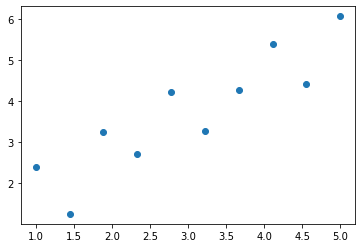

In [255]:
import matplotlib.pyplot as plt
x = np.concatenate((np.linspace(1, 5, 10).reshape(10, 1), np.ones(10).reshape(10, 1)), axis = 1)
y = x[:,0].copy() + 2*np.random.rand(10) - 0.5
plt.scatter(x[:,0], y)

In [256]:
theta = np.linalg.lstsq(x, y, rcond=None)[0]
print(theta)

[0.94922183 0.86855815]


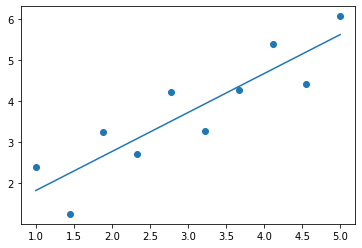

In [257]:
plt.scatter(x[:,0], y)
plt.plot(x[:,0], x[:,0]*theta[0] + theta[1])

In [258]:
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(theta)

[0.94922183 0.86855815]


How does this relate to transformations? Let's try!

Our slides on transformations: https://drive.google.com/file/d/1isX1q9X31akdeIJwdbP5xNqn78xzhlXb/view

In [260]:
x = np.random.rand(10,2)*10
print("x = ", x.shape, x.dtype, "array: \n", x)
# Homogeneous coordinates!
x_homogeneous = np.concatenate([x, np.ones((10,1))], axis=1)
print("x_homogeneous = ", x_homogeneous.shape, x_homogeneous.dtype, "array: \n", x_homogeneous)

translation = np.array([3, -5])
scaling = 2

y = (x *scaling) + translation
# Add noise
y_noisy = y + np.random.rand(10,2)*0
print("\ny_noisy = ", y_noisy.shape, y_noisy.dtype, "array: \n", y_noisy)
# Homogeneous coordinates!
y_noisy_homogeneous = np.concatenate([y_noisy, np.ones((10,1))], axis=1)
print("y_noisy_homogeneous = ", y_noisy_homogeneous.shape, y_noisy_homogeneous.dtype, "array: \n", y_noisy_homogeneous)

# Fit with lstsq!
H = np.linalg.lstsq(x_homogeneous, y_noisy_homogeneous, rcond=None)[0]
print("\nH = ", H.shape, H.dtype, "array: \n", H)
error = np.round(np.dot(x_homogeneous, H) - y_noisy_homogeneous, decimals=8)
print("Error = np.dot(x_homogeneous,H) - y_noisy_homogeneous = \n", error)



x =  (10, 2) float64 array: 
 [[1.39941635 4.76123429]
 [7.01025886 6.9013063 ]
 [0.51536447 7.32122557]
 [0.86941925 2.83138968]
 [6.39695368 1.68163478]
 [8.19599373 9.16564738]
 [4.82952555 7.4689938 ]
 [4.03971542 9.63574017]
 [1.51324953 9.24602979]
 [5.20893049 2.26005861]]
x_homogeneous =  (10, 3) float64 array: 
 [[1.39941635 4.76123429 1.        ]
 [7.01025886 6.9013063  1.        ]
 [0.51536447 7.32122557 1.        ]
 [0.86941925 2.83138968 1.        ]
 [6.39695368 1.68163478 1.        ]
 [8.19599373 9.16564738 1.        ]
 [4.82952555 7.4689938  1.        ]
 [4.03971542 9.63574017 1.        ]
 [1.51324953 9.24602979 1.        ]
 [5.20893049 2.26005861 1.        ]]

y_noisy =  (10, 2) float64 array: 
 [[ 5.7988327   4.52246858]
 [17.02051773  8.80261259]
 [ 4.03072894  9.64245114]
 [ 4.73883849  0.66277937]
 [15.79390737 -1.63673043]
 [19.39198747 13.33129476]
 [12.65905109  9.9379876 ]
 [11.07943083 14.27148034]
 [ 6.02649907 13.49205957]
 [13.41786098 -0.47988279]]
y_noisy_

In [261]:
# Compare with theoretical H
scaling_matrix = np.eye(2)*scaling
translation_vector = translation.reshape(2,1)
homogeneous_row = np.array([0,0,1]).reshape(1,3)
print("\nscaling_matrix = ", scaling_matrix.shape, scaling_matrix.dtype, "array: \n", scaling_matrix)
print("Translation_vector = ", translation_vector.shape, translation_vector.dtype, "array: \n", translation_vector)
print("homogeneous_row = ", homogeneous_row.shape, homogeneous_row.dtype, "array: \n", homogeneous_row)
H_theoretical = np.concatenate([scaling_matrix, translation_vector], axis=1)
H_theoretical = np.concatenate([H_theoretical, homogeneous_row], axis=0)
print("H_theoretical = ", H_theoretical.shape, H_theoretical.dtype, "array: \n", H_theoretical)
print("H = ", H.shape, H.dtype, "array: \n", np.round(H, decimals=8))
print("Diff = H_theoretical - H = \n", np.round(H_theoretical - H, decimals=8))


scaling_matrix =  (2, 2) float64 array: 
 [[2. 0.]
 [0. 2.]]
Translation_vector =  (2, 1) int32 array: 
 [[ 3]
 [-5]]
homogeneous_row =  (1, 3) int32 array: 
 [[0 0 1]]
H_theoretical =  (3, 3) float64 array: 
 [[ 2.  0.  3.]
 [ 0.  2. -5.]
 [ 0.  0.  1.]]
H =  (3, 3) float64 array: 
 [[ 2.  0.  0.]
 [-0.  2. -0.]
 [ 3. -5.  1.]]
Diff = H_theoretical - H = 
 [[ 0. -0.  3.]
 [ 0.  0. -5.]
 [-3.  5. -0.]]


### Vectorizing equations
In classes with CS 231N, you'll want to write your equations in matrix format because it's more effecient to run operations in parallel. Here's an example: This can be really tough, so here's an example:

Suppose we didn't know that linear regression had a closed form solution. We could also solve the problem above using gradient descent.

The gradient descent update rule looks like this:
$$\theta_{t+1} =\theta_t - \alpha \nabla_{\theta} L(\theta, X)$$

So we need to find the gradient with respect to $\theta$. Recall that a gradient is a vector of partial derivatives.  So let's start by finding just one partial derivative.

$$\frac{\partial}{\partial \theta_j}L(\theta, X) = \Sigma_{i = 1}^n 2(y_i - f(x_i))(-x_i[j])$$ where $$f(x_i) = \theta_0 + \theta_1 x_1 + ... +\theta_n x_n$$

Now the task is to get this into matrix format! Our theta vector is $\theta = [\theta_0,\theta_1] \in R^2$. Notice that our residuals can be written as a vector, $y - f(\theta, X) \in R^n$.

In matrix multiplication, we dot the row of the first matrix with the columns of the second matrix.  A sum (like above) can oftern be expressed as a row times a column.

$$\theta_{t+1} =\theta_t - \alpha X^T (y - f(X, \theta))$$




    

### In numpy

np.repeat (https://numpy.org/doc/stable/reference/generated/numpy.repeat.html) and np.tile (https://numpy.org/doc/stable/reference/generated/numpy.tile.html) can be really useful for this!

# Making Plots in Jupyter Notebook
A Matplotlib figure can be categorized into several parts as below:
    
**Figure:** It is a whole figure which may contain one or more than one axes (plots). You can think of a Figure as a canvas which contains plots.

**Axes:** It is what we generally think of as a plot. A Figure can contain many Axes. It contains two or three (in the case of 3D) Axis objects. Each Axes has a title, an x-label and a y-label.

**Axis:** They are the number line like objects and take care of generating the graph limits.

In [262]:
import matplotlib.pyplot as plt

[ 0  1  4  9 16 25 36 49 64 81]


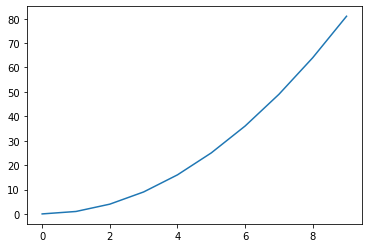

In [263]:
x = np.arange(10)**2
print(x)
plt.plot(x)
plt.show()

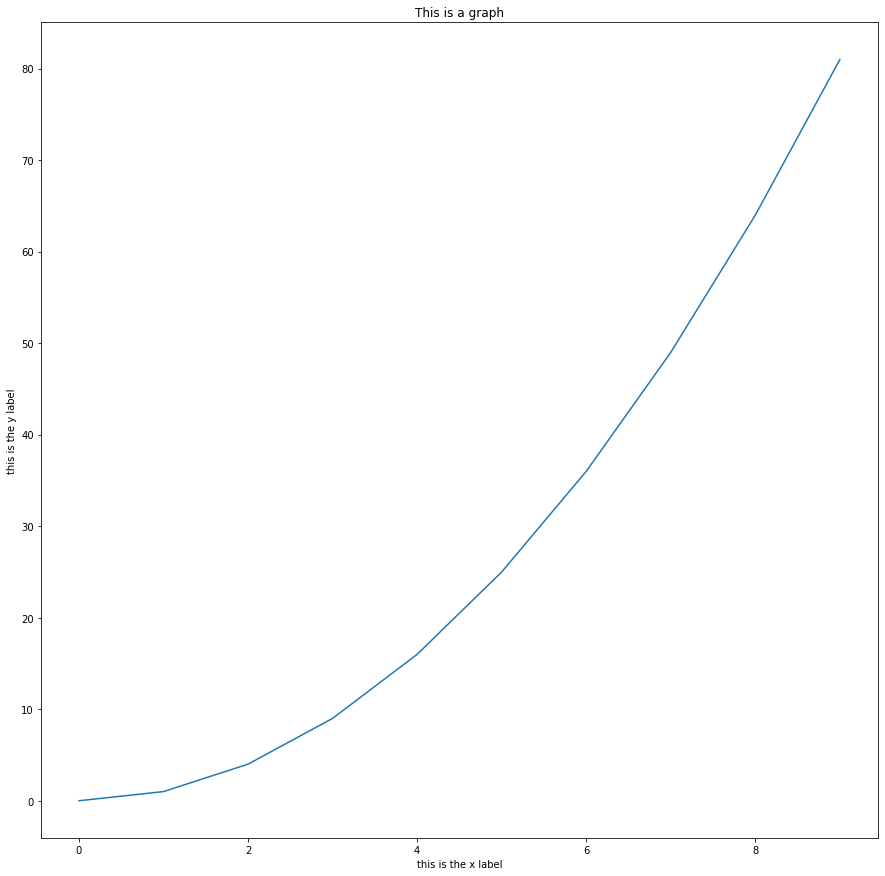

In [264]:
plt.figure(figsize = (15,15))
plt.plot(x)
plt.title("This is a graph")
plt.xlabel("this is the x label")
plt.ylabel("this is the y label")
plt.show()

### Additional Resources
https://www.youtube.com/watch?v=8Mpc9ukltVA

https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596

https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html

https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/